# Importing the required Libraries 

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas_profiling as pp
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.gridspec as gs
import altair as alt

# Inserting the Data set in Comma Seprated Value format

In [2]:
dataset = pd.read_csv("C:/Users/hp/Desktop/Pandas/Excel data analysis/flags1.csv",
                      names =["Name","Continent","Zone","Area","Population","Language","religion",
                         "Num_bar","Num_stripes","number_of_colours","red","green","blue","gold","white","black","orange",
                         "mainhue","have_circle","have_cross","Saltires","quarters","have_sun_stars","crescent",
                        "triangles","icon","animate","text","topleft","botright"])
dataset.head()

,Name,Continent,Zone,Area,Population,Language,religion,Num_bar,Num_stripes,number_of_colours,...,Saltires,quarters,have_sun_stars,crescent,triangles,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,0,3,5,1,...,0,1,0,0,1,0,0,black,green,2
1,Albania,3,1,29,3,6,0,0,3,1,...,0,1,0,0,0,1,0,red,red,6
2,Algeria,4,1,2388,20,8,2,0,3,1,...,0,1,1,0,0,0,0,green,white,2
3,American-Samoa,6,3,0,0,1,0,0,5,1,...,0,0,0,1,1,1,0,blue,red,1
4,Andorra,3,1,0,0,6,3,0,3,1,...,0,0,0,0,0,0,0,blue,red,0


In [3]:
dataset.describe()
dataset.shape

(194, 30)

In [4]:
dataset.dtypes

Name                 object
Continent             int64
Zone                  int64
Area                  int64
Population            int64
Language              int64
religion              int64
Num_bar               int64
Num_stripes           int64
number_of_colours     int64
red                   int64
green                 int64
blue                  int64
gold                  int64
white                 int64
black                 int64
orange               object
mainhue               int64
have_circle           int64
have_cross            int64
Saltires              int64
quarters              int64
have_sun_stars        int64
crescent              int64
triangles             int64
icon                  int64
animate               int64
text                 object
topleft              object
botright              int64
dtype: object

In [5]:
dataset.columns

Index(['Name', 'Continent', 'Zone', 'Area', 'Population', 'Language',
       'religion', 'Num_bar', 'Num_stripes', 'number_of_colours', 'red',
       'green', 'blue', 'gold', 'white', 'black', 'orange', 'mainhue',
       'have_circle', 'have_cross', 'Saltires', 'quarters', 'have_sun_stars',
       'crescent', 'triangles', 'icon', 'animate', 'text', 'topleft',
       'botright'],
      dtype='object')

## Analyzing the Data using Pandas_Profiling

In [6]:
pp.ProfileReport(dataset)

Number of variables,30
Number of observations,194
Total Missing (%),0.0%
Total size in memory,45.5 KiB
Average record size in memory,240.4 B
Numeric,13
Categorical,3
Boolean,13
Date,0
Text (Unique),1
Rejected,0



#### Analyzing the area and population column

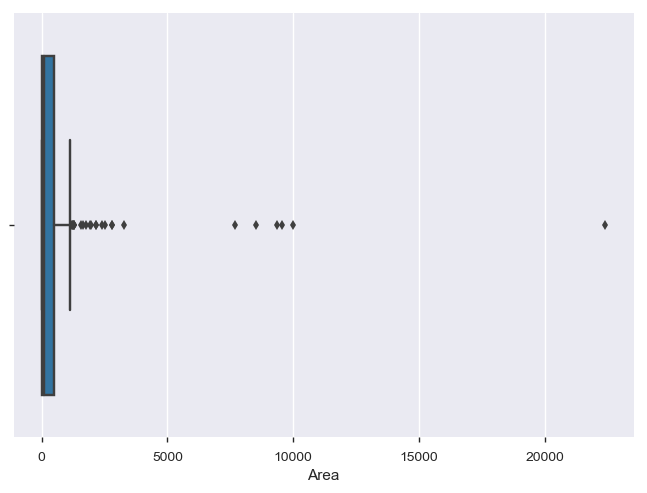

In [7]:
sns.boxplot(x=dataset["Area"])

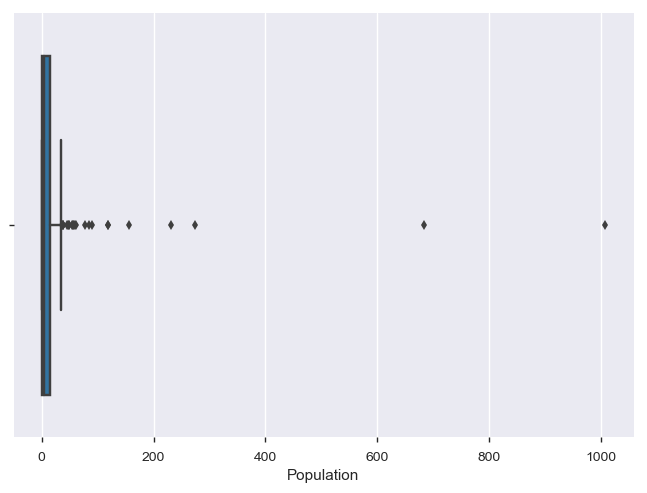

In [8]:
sns.boxplot(dataset['Population'])

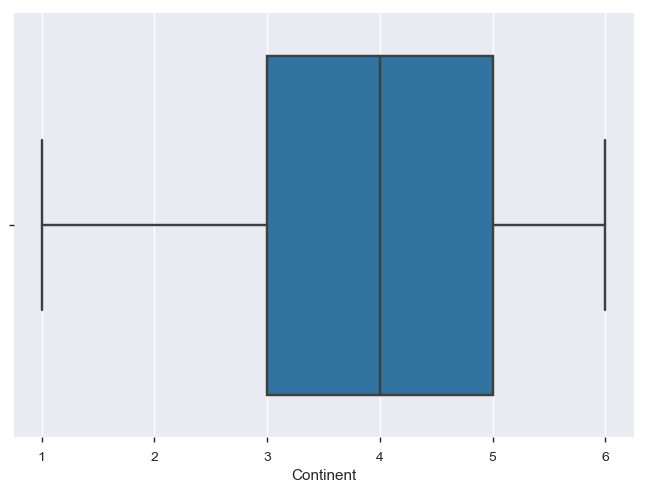

In [9]:
sns.boxplot(dataset['Continent'])

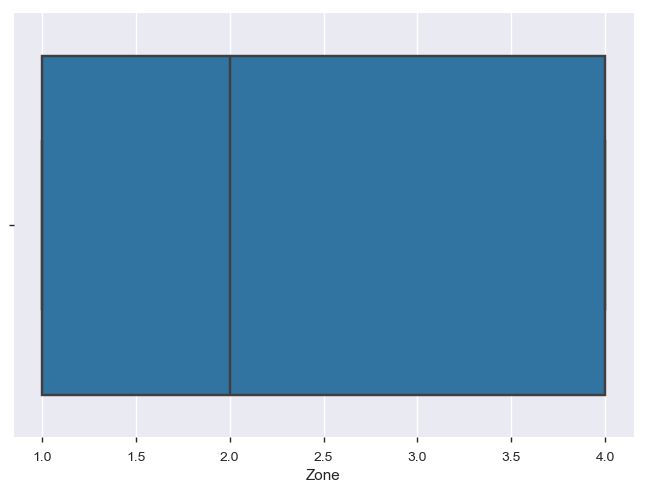

In [10]:
sns.boxplot(dataset['Zone'])

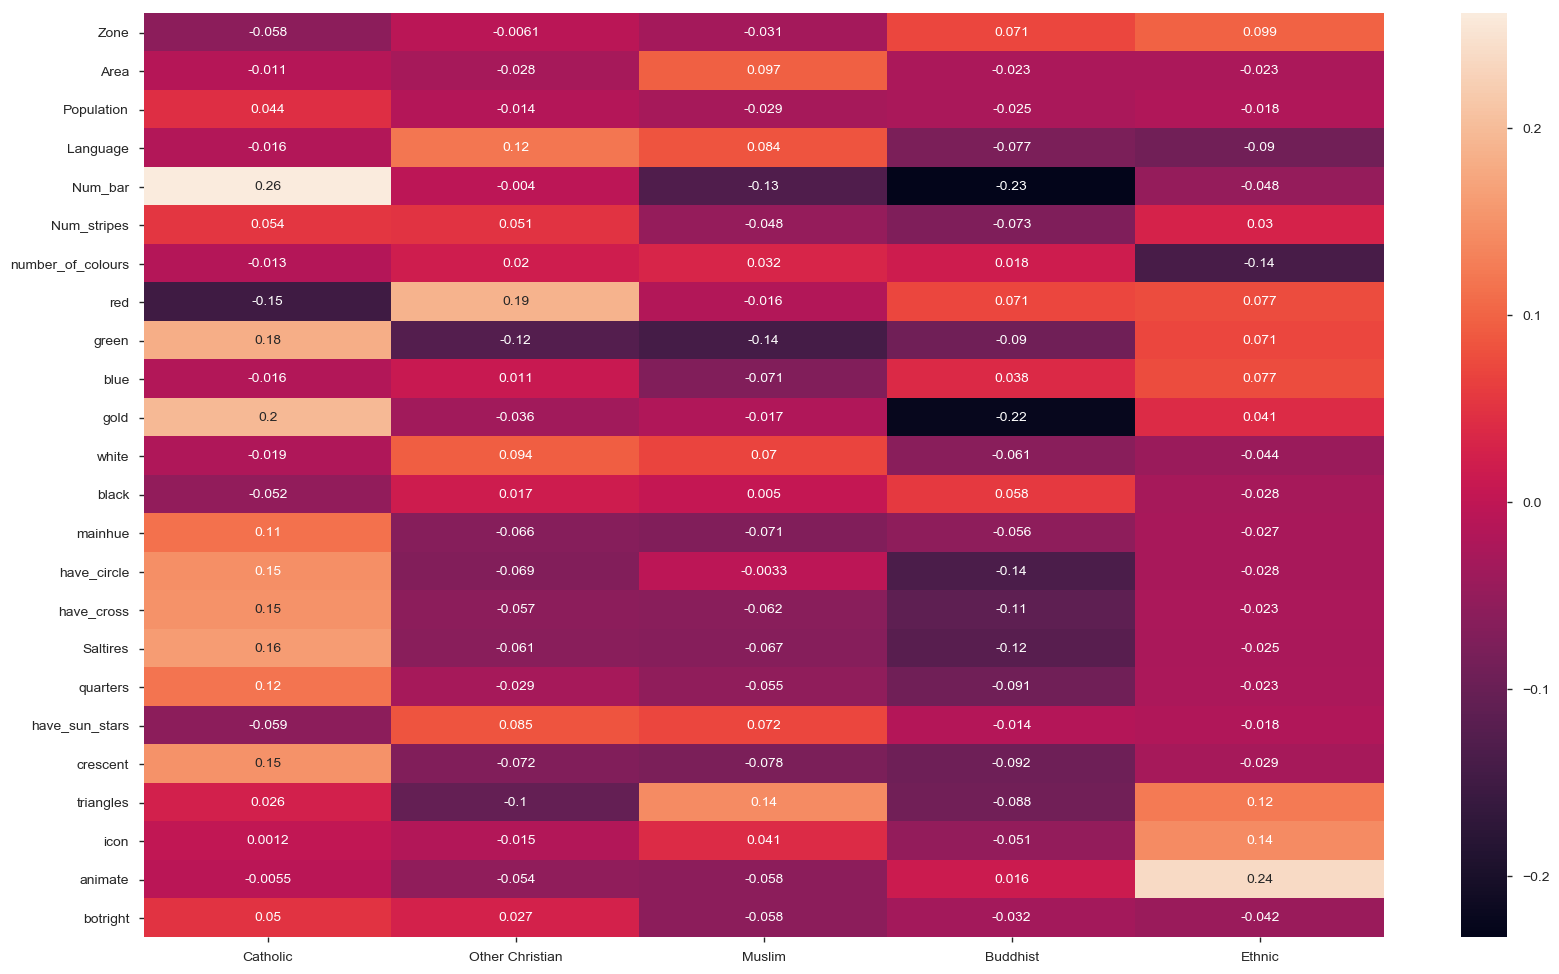

In [11]:
corr_df = dataset
corr_df = corr_df.reset_index()
extra_columns = pd.get_dummies(corr_df["religion"])
extra_columns = extra_columns.reset_index()
extra_columns = extra_columns.rename(columns ={ 0:"Catholic", 1:"Other Christian", 2:"Muslim", 3:"Buddhist", 4:"Hindu",
               5:"Ethnic", 6:"Marxist", 7:"Others"})
corr_df = pd.merge(corr_df,extra_columns,on="index",how="inner")

corr_df = corr_df.drop(["index","religion","Continent"], 1)
extra_columns = extra_columns.drop("index", 1)
Var_Corr = corr_df.corr().filter(extra_columns).drop(extra_columns)

# plot the heatmap and annotation on it
fig = plt.figure(figsize=(20,12))
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.index, annot=True)

In [12]:
dataset.isnull().sum()

Name                 0
Continent            0
Zone                 0
Area                 0
Population           0
Language             0
religion             0
Num_bar              0
Num_stripes          0
number_of_colours    0
red                  0
green                0
blue                 0
gold                 0
white                0
black                0
orange               0
mainhue              0
have_circle          0
have_cross           0
Saltires             0
quarters             0
have_sun_stars       0
crescent             0
triangles            0
icon                 0
animate              0
text                 0
topleft              0
botright             0
dtype: int64

In [13]:
print("PERCENTAGE MISSING VALUES FOR EACH ATTRIBUTE")
for i in dataset:
    print(i,100-(400-dataset[i].isnull().sum())/4,"%")

PERCENTAGE MISSING VALUES FOR EACH ATTRIBUTE
Name 0.0 %
Continent 0.0 %
Zone 0.0 %
Area 0.0 %
Population 0.0 %
Language 0.0 %
religion 0.0 %
Num_bar 0.0 %
Num_stripes 0.0 %
number_of_colours 0.0 %
red 0.0 %
green 0.0 %
blue 0.0 %
gold 0.0 %
white 0.0 %
black 0.0 %
orange 0.0 %
mainhue 0.0 %
have_circle 0.0 %
have_cross 0.0 %
Saltires 0.0 %
quarters 0.0 %
have_sun_stars 0.0 %
crescent 0.0 %
triangles 0.0 %
icon 0.0 %
animate 0.0 %
text 0.0 %
topleft 0.0 %
botright 0.0 %


### Analyzing the correlation between the attribute

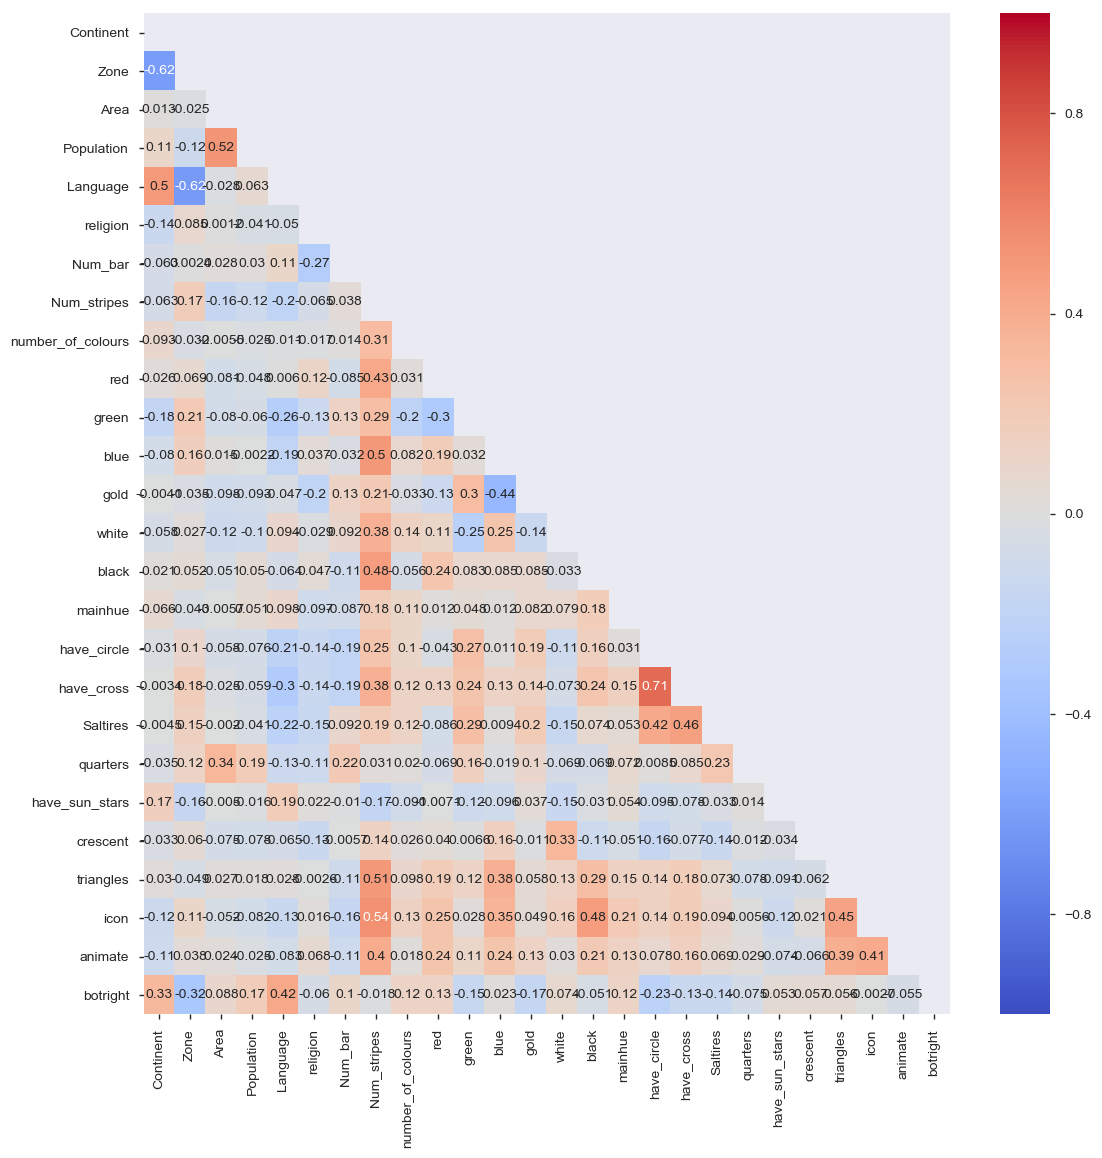

In [14]:
mask = np.zeros_like(dataset.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(13,13))
sns.heatmap(dataset.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True,
            mask = mask);

## Analyzing variation of religion with Different Attributes

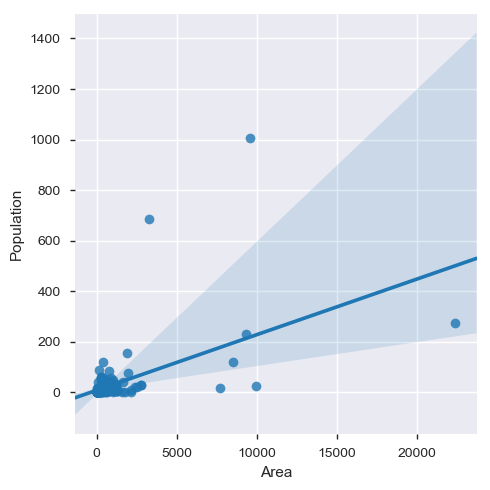

In [15]:
sns.lmplot('Area','Population',data=dataset)

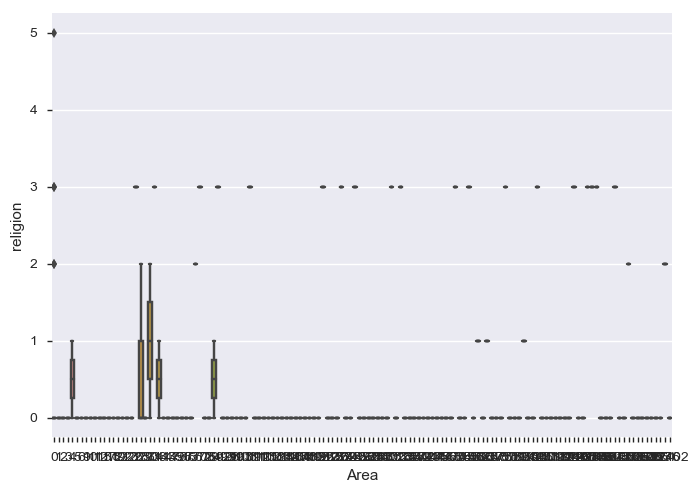

In [16]:
sns.boxplot('Area','religion',data=dataset)

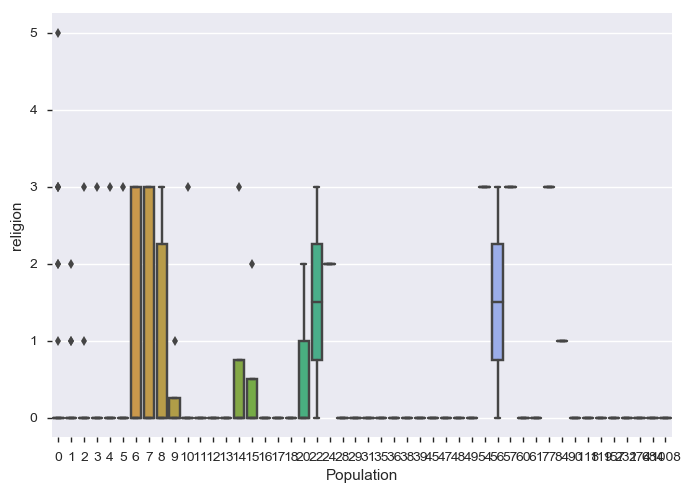

In [17]:
sns.boxplot('Population','religion',data=dataset)

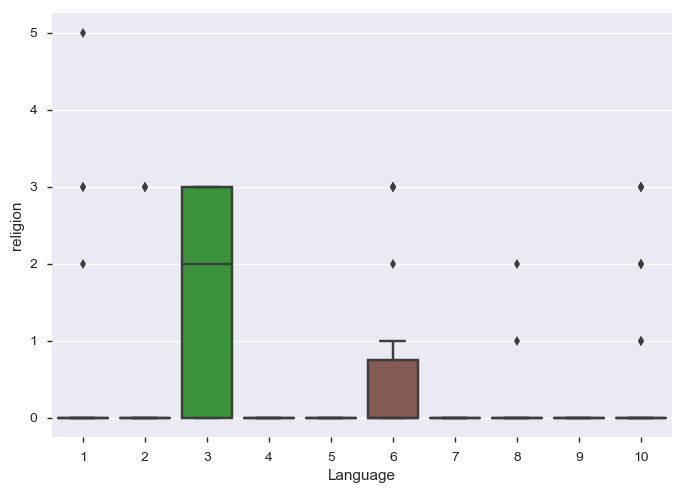

In [18]:
sns.boxplot('Language','religion',data=dataset)

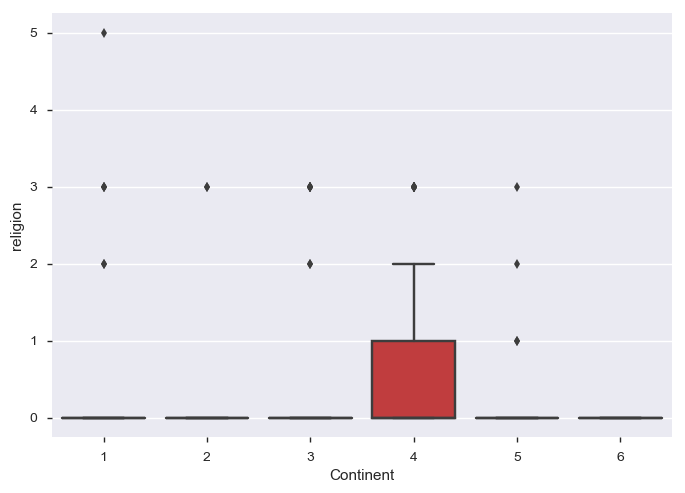

In [19]:
sns.boxplot('Continent','religion',data=dataset)

In [20]:
country_df = dataset.groupby('Continent')['religion'].agg(['count'])
religion_dic = { 0:"Catholic", 1:"Other Christian", 2:"Muslim", 3:"Buddhist", 4:"Hindu",
               5:"Ethnic", 6:"Marxist", 7:"Others"}
religion_df =dataset["religion"]
religion_df = religion_df.map(religion_dic)
religions = religion_df.value_counts()

Text(0.5, 1.0, 'Distribution of Flags by Religion')

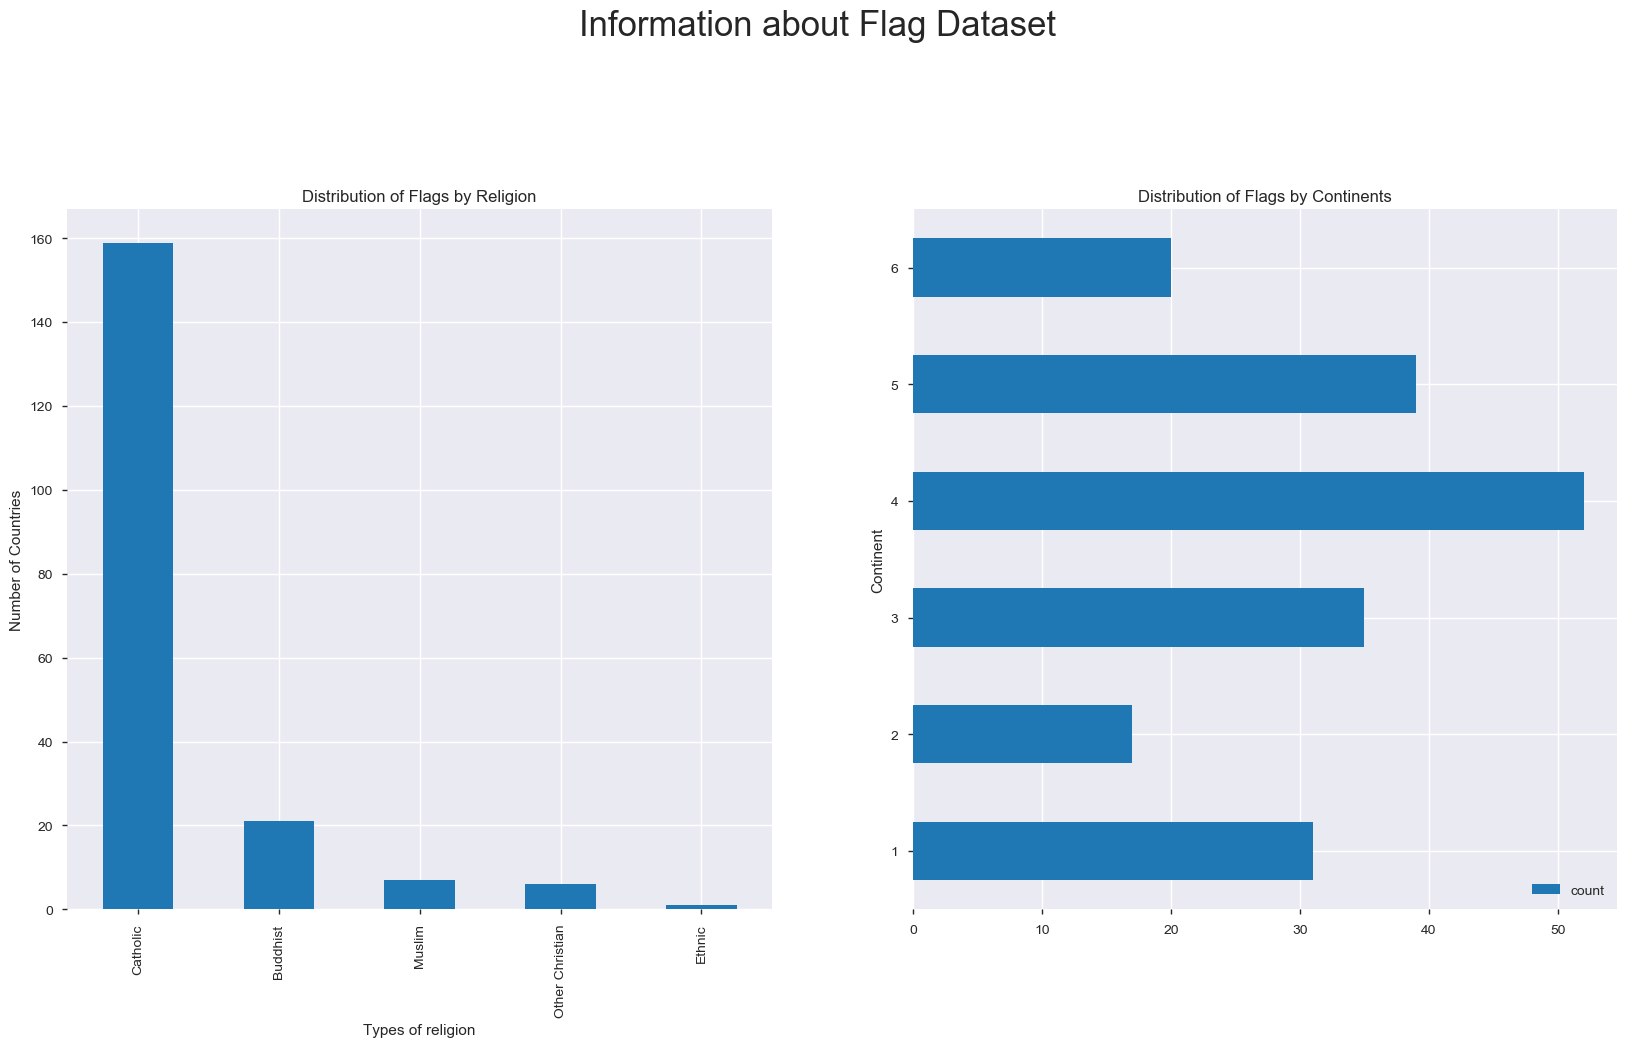

In [21]:
fig = plt.figure(figsize=(20,20))  
g = gs.GridSpec(2,2)
ax = plt.subplot(g[0,0])
ax2 = plt.subplot(g[0,1])

fig.suptitle("Information about Flag Dataset", size= 25)

ax2.set_title("Distribution of Flags by Continents")

country_df.plot(kind="barh",ax=ax2 , legend=True)
ax2.legend(loc='upper left')
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.legend(loc=4)
ax.set_xlabel("Types of religion")

religions.plot(kind="bar", ax = ax)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_ylabel("Number of Countries")
ax.set_title("Distribution of Flags by Religion")

In [22]:
dataset.shape

(194, 30)

### As we can see value of Area and Population as 0 which is not poosible

In [23]:
dataset["Area"].head()

0     648
1      29
2    2388
3       0
4       0
Name: Area, dtype: int64

In [24]:
dataset["Population"].head()

0    16
1     3
2    20
3     0
4     0
Name: Population, dtype: int64

calculating the mean of population and area

In [25]:
x = dataset["Area"].mean()
y = dataset["Population"].mean()

In [26]:
x

700.0463917525773

In [27]:
y

23.2680412371134

## Area and population zero values which is not poosible so we will replace it mean value
### Now the 0 values are replaced by mean area which will make the dataset more accurate

In [28]:
dataset["Area"] = dataset["Area"].replace( 0,x,regex = True)
dataset["Population"] = dataset["Population"].replace(0,y,regex = True)

In [29]:
dataset["Area"].head()

0     648.000000
1      29.000000
2    2388.000000
3     700.046392
4     700.046392
Name: Area, dtype: float64

As we can see there are catregorival values in 3 attributes

# Encoding Categorical Attributes
### As the data type of three attribute is object so we have to convert it to  int 

In [30]:
dataset = pd.get_dummies(dataset,columns = ['text','topleft','orange'])

In [31]:
dataset.shape[1]

50

In [32]:
dataset.dtypes

Name                  object
Continent              int64
Zone                   int64
Area                 float64
Population           float64
Language               int64
religion               int64
Num_bar                int64
Num_stripes            int64
number_of_colours      int64
red                    int64
green                  int64
blue                   int64
gold                   int64
white                  int64
black                  int64
mainhue                int64
have_circle            int64
have_cross             int64
Saltires               int64
quarters               int64
have_sun_stars         int64
crescent               int64
triangles              int64
icon                   int64
animate                int64
botright               int64
text_black             uint8
text_blue              uint8
text_gold              uint8
text_green             uint8
text_orange            uint8
text_red               uint8
text_white             uint8
topleft_black 

# Applying Classification Algorithms
## Splitting Testing and Training Data

In [33]:
X = dataset.iloc[:,1:48].values
y = dataset.iloc[:,49].values

In [34]:
y

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

##### Splitting the dependent attribute that we want to predict and independent attribute

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)

## Normalizing the data

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying the SVM classifier

In [37]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state=0)
classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [38]:
y_pred = classifier.predict(X_test)

### Checking its Accuracy

In [39]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.8367346938775511

In [40]:
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)

[[41  0]
 [ 8  0]]


In [41]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        41
           1       0.00      0.00      0.00         8

   micro avg       0.84      0.84      0.84        49
   macro avg       0.42      0.50      0.46        49
weighted avg       0.70      0.84      0.76        49



E:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion matrix plot


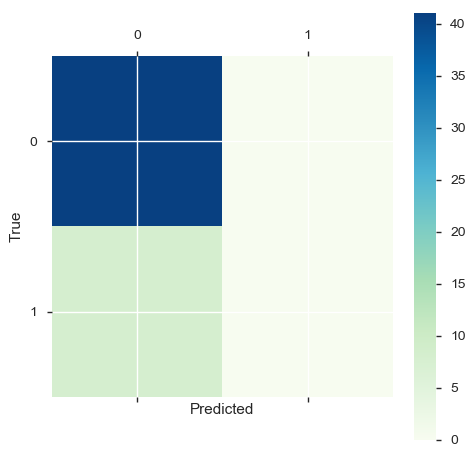

In [45]:
c_m = confusion
ax=plt.matshow(c_m,cmap=plt.cm.GnBu)
print('Confusion matrix plot')
plt.colorbar(ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



# Applying the Naive Bayes classifier

In [46]:
from sklearn.naive_bayes import GaussianNB
classifier1 = GaussianNB()
classifier1.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [47]:
y_pred1 = classifier1.predict(X_test)

### Checking its Accuracy

In [48]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred1)

0.8571428571428571

In [49]:
confusion1 = metrics.confusion_matrix(y_test, y_pred1)
print(confusion1)

[[37  4]
 [ 3  5]]


In [50]:
print(metrics.classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91        41
           1       0.56      0.62      0.59         8

   micro avg       0.86      0.86      0.86        49
   macro avg       0.74      0.76      0.75        49
weighted avg       0.86      0.86      0.86        49



Confusion matrix plot


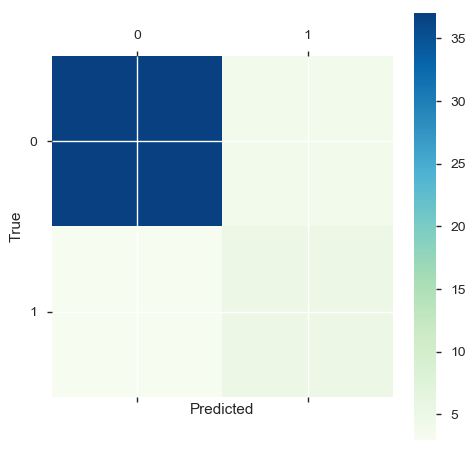

In [51]:
c_m = confusion1
ax=plt.matshow(c_m,cmap=plt.cm.GnBu)
print('Confusion matrix plot')
plt.colorbar(ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Applying the Decision Tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier()
classifier2.fit(X_train,y_train)

In [ ]:
y_pred2 = classifier2.predict(X_test)

### Checking its Accuracy

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred2)

In [ ]:
confusion2 = metrics.confusion_matrix(y_test, y_pred2)
print(confusion2)

In [ ]:
print(metrics.classification_report(y_test,y_pred2))

# Applying the RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(n_estimators=16,criterion='entropy')
classifier3.fit(X_train,y_train)

In [ ]:
y_pred3 = classifier3.predict(X_test)

### Checking its Accuracy

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred3)

In [ ]:
confusion3 = metrics.confusion_matrix(y_test, y_pred3)
print(confusion3)

In [ ]:
print(metrics.classification_report(y_test,y_pred3))